<a href="https://colab.research.google.com/github/eddev00/Clustering-FIFA22-players/blob/main/Clustering_FIFA22_players_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary Libraries

In [73]:
import pandas as pd
import numpy as np

####Read Players Data from github file

In [74]:
players = pd.read_csv('https://raw.githubusercontent.com/eddev00/Clustering-FIFA22-players/main/players_22.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


####List of Features to cluster:

In [76]:
features = ['overall','potential','wage_eur','value_eur','age']

Subset players dataframe using features and removing Null values

In [77]:
players = players.dropna(subset=features)

In [78]:
data = players[features].copy()

#Scaling the Data

In this step, we'll try to scale our data in a range of 1 to 10, so every column of our dataframe can be treated equaly while clustering.(as we observe on the dataframe, we see that each column have different max min values).

In [79]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 +1
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


#Initialize random centroids:

In [80]:
def random_centroids(data,k):
   centroids = []
   for i in range(k):
      centroid = data.apply(lambda x: float(x.sample()))
      centroids.append(centroid)
   return pd.concat(centroids,axis=1)   

In [81]:
centroids= random_centroids(data,5)

In [82]:
centroids

,0,1,2,3,4
overall,5.891304,3.934783,5.891304,5.891304,4.326087
potential,7.652174,4.130435,3.934783,6.478261,5.108696
wage_eur,1.115880,1.527897,1.000000,2.145923,1.270386
value_eur,1.021620,1.039017,1.019300,1.301143,1.050616
age,2.666667,4.333333,3.333333,2.666667,5.666667


#Labeling data points

First we calculate distance between our data and each cluster centroid.

In [83]:
def get_labels(data, centroids):
   distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))
   return distances.idxmin(axis=1)

In [84]:
labels = get_labels(data, centroids)

In [85]:
labels.value_counts()

1    7383
4    5599
3    4171
0    1636
2     376
dtype: int64

Next Step:
*   Spliting our data by clusters(labels).
*   Calculate Geometric mean of each feature.

**Result:** new cluster centroids.

In [86]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [87]:
next_centroids = new_centroids(data, labels, 5)
next_centroids

,0,1,2,3,4
overall,5.344729,3.396131,5.255422,5.244110,5.286139
potential,7.264236,4.431446,5.272171,6.354135,4.944952
wage_eur,1.248462,1.034107,1.146936,1.382961,1.193237
value_eur,1.279723,1.025442,1.077412,1.244404,1.073839
age,2.520740,3.205564,3.735543,3.186810,5.840448


#Building the algorithm

In [88]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from IPython.display import clear_output


Plotting iterations

In [89]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

our k-means implimentation

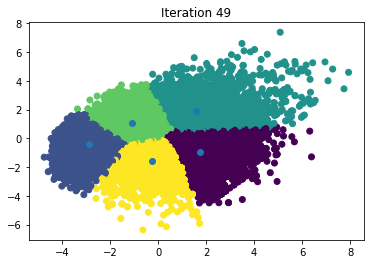

In [90]:
max_iterations= 100
k = 5
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration= 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  
  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration +=1

In [98]:
our_centroids = pd.DataFrame(centroids,columns=features).T
our_centroids

,0,1,2,3,4
overall,4.922169,5.710282,2.982986,4.248672,7.092703
potential,6.091775,5.351023,4.838759,4.072554,7.304267
wage_eur,1.146664,1.280714,1.021182,1.053021,2.289531
value_eur,1.094748,1.091216,1.019091,1.027858,1.917699
age,3.127985,6.063895,2.457147,5.047389,4.306018


In [92]:
players[labels ==3][["short_name"]+features]

,short_name,overall,potential,wage_eur,value_eur,age
2866,Osvaldão Murilo,73,73,9000.0,3100000.0,21
2871,Nicolás Formido,73,73,16000.0,3600000.0,21
2877,Neviano Neves,73,73,17000.0,3600000.0,21
2884,Luis Couprins,73,73,9000.0,3200000.0,21
2885,Nuno Lisareda,73,73,19000.0,3600000.0,21
...,...,...,...,...,...,...
17708,K. Habibullah,56,78,500.0,450000.0,17
17747,F. Weiler,56,76,550.0,400000.0,18
17785,H. Diarra,56,77,500.0,425000.0,17
18071,Y. Djiga,55,77,600.0,375000.0,18


#Comparing sklearn K-means implimentation to ours 

In [93]:
from sklearn.cluster import KMeans

In [94]:
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [95]:
centroids = kmeans.cluster_centers_

scikit-learn K-means algo implimentation result

In [96]:
pd.DataFrame(centroids,columns=features).T

,0,1,2,3,4
overall,4.922169,5.710282,2.982986,4.248672,7.092703
potential,6.091775,5.351023,4.838759,4.072554,7.304267
wage_eur,1.146664,1.280714,1.021182,1.053021,2.289531
value_eur,1.094748,1.091216,1.019091,1.027858,1.917699
age,3.127985,6.063895,2.457147,5.047389,4.306018


vs Result of our K-means implimentation

In [99]:
our_centroids

,0,1,2,3,4
overall,4.922169,5.710282,2.982986,4.248672,7.092703
potential,6.091775,5.351023,4.838759,4.072554,7.304267
wage_eur,1.146664,1.280714,1.021182,1.053021,2.289531
value_eur,1.094748,1.091216,1.019091,1.027858,1.917699
age,3.127985,6.063895,2.457147,5.047389,4.306018
